# **Smartwatch Activity Analysis**
## Project Overview
This project analyzes smartwatch activity data to extract insights into users' physical activity trends. This includes cleaning the data, exploring patterns, and engineering new features to better understand activity levels.

## **Importing Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

## **Loading the Dataset**

In [4]:
data = pd.read_csv("/content/dailyActivity_merged.csv")
print(data.head())

           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06

## **Data Cleaning**
Before proceeding with analysis, we check for missing values, duplicates, and ensure correct data types.

In [9]:
print(data.isnull().sum())

# Remove duplicates
data.drop_duplicates(inplace=True)

# Convert date columns
if 'ActivityDate' in data.columns:
    data['ActivityDate'] = pd.to_datetime(data['ActivityDate'])

# Display dataset info
data.info()

# Feature Engineering
data['ActiveRatio'] = data['VeryActiveMinutes'] / (data['SedentaryMinutes'] + 1)  # Avoid division by zero

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
ActiveRatio                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance          

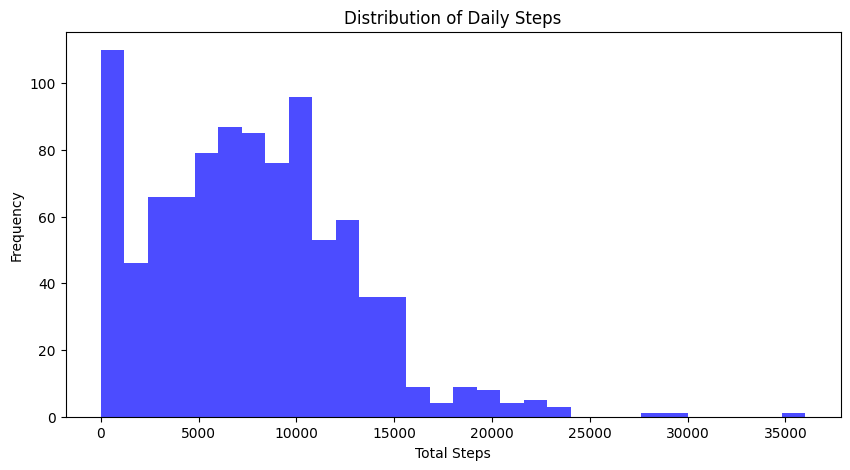

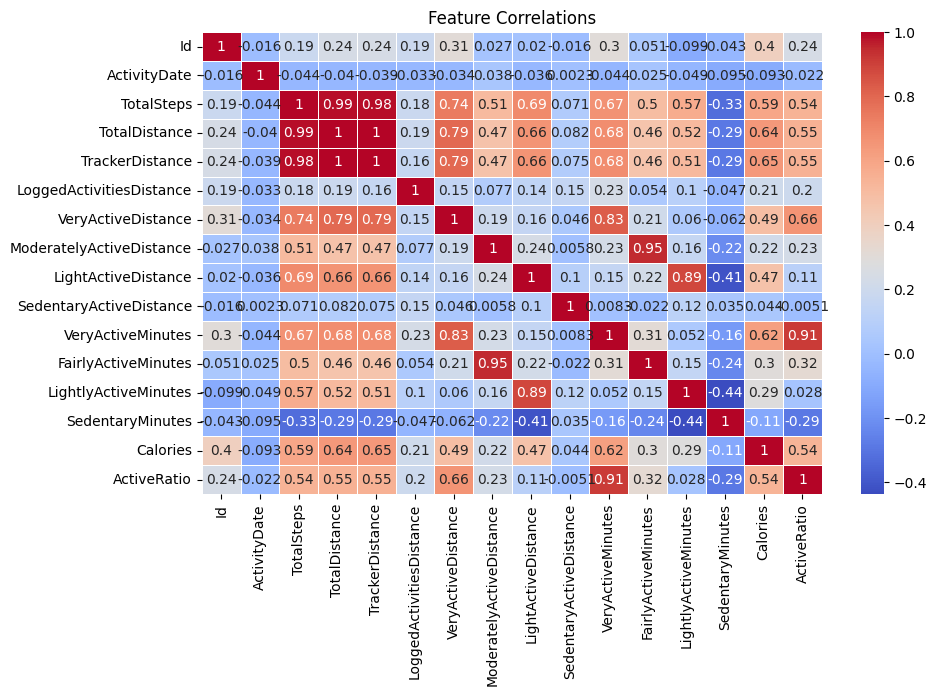

In [8]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,5))
plt.hist(data['TotalSteps'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Total Steps')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Steps')
plt.show()

# Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlations')
plt.show()

In [10]:
data["TotalMinutes"] = data["VeryActiveMinutes"] + data["FairlyActiveMinutes"] + data["LightlyActiveMinutes"] + data["SedentaryMinutes"]
print(data["TotalMinutes"].sample(5))

475    1440
236    1440
292    1440
467    1038
688     988
Name: TotalMinutes, dtype: int64


In [11]:
print(data.describe())

                 Id                   ActivityDate    TotalSteps  \
count  9.400000e+02                            940    940.000000   
mean   4.855407e+09  2016-04-26 06:53:37.021276672   7637.910638   
min    1.503960e+09            2016-04-12 00:00:00      0.000000   
25%    2.320127e+09            2016-04-19 00:00:00   3789.750000   
50%    4.445115e+09            2016-04-26 00:00:00   7405.500000   
75%    6.962181e+09            2016-05-04 00:00:00  10727.000000   
max    8.877689e+09            2016-05-12 00:00:00  36019.000000   
std    2.424805e+09                            NaN   5087.150742   

       TotalDistance  TrackerDistance  LoggedActivitiesDistance  \
count     940.000000       940.000000                940.000000   
mean        5.489702         5.475351                  0.108171   
min         0.000000         0.000000                  0.000000   
25%         2.620000         2.620000                  0.000000   
50%         5.245000         5.245000               

# Analyzing data

In [12]:
#Relationship between calories and total steps

figure = px.scatter(data_frame = data, x="Calories", y="TotalSteps", size="VeryActiveMinutes", trendline="ols", title="Relationship between calories and total steps")
figure.show()

In [13]:
#Average total number of active minutes in a day
label = ["Very Active Minutes", "Fairly Active Minutes", "Lightly Active Minutes", "Inactive Minutes"]
counts = data[["VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes"]].mean()
colors = ['gold', 'lightgreen', 'pink', 'lightblue']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Total Active Minutes')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

Observation:
1. 81.3% of Total inactive minutes in a day
2. 15.8% of Lightly active minutes in a day
3. On an average, only 21 minutes (1.74%) were very active
4. and 1.11% (13minutes) of fairly active minutes in a day

In [14]:
# Add "Day" column to the dataset
data["Day"] = data["ActivityDate"].dt.day_name()
print(data["Day"].head())

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: Day, dtype: object


### very active, fairly active, and lightly active minutes on each day of the week

In [15]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["VeryActiveMinutes"],
    name='Very Active',
    marker_color='purple'
))
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["FairlyActiveMinutes"],
    name='Fairly Active',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["LightlyActiveMinutes"],
    name='Lightly Active',
    marker_color='pink'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

### number of inactive minutes on each day of the week:

In [16]:
day = data["Day"].value_counts()
label = day.index
counts = data["SedentaryMinutes"]
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Inactive Minutes Daily')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

#### Thyrsday is the most inactive day according to the lifestyle of all the individuals in the dataset.

### number of calories burned on each day of the week:

In [17]:
calories = data["Day"].value_counts()
label = calories.index
counts = data["Calories"]
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Calories Burned Daily')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

#### Tuesday is one of the most active day for all individuals in the dataset